In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt 

ACTIVATION FUNCTIONS

In [2]:

##1.Sigmoid Activation Function 
def sig(z):
    s=1/(1+np.exp(-z))
    return s
##Derivative of Sigmoid
def dsig(s):
    das=s*(1-s)
    return das


##TANH ACTIVATION FUNCTION
def tanh(z):
    s= (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    return s
##Derivative of Tanh
def dtanh(s):
    dat=(1-s**2)
    return dat


##Relu activation function 
def relu(z):
    s=np.maximum(0,z)
    return s 
##Derivative of Relu
def drelu(s):
    dar=(np.int64(s>0))
    return dar

##Leaky Relu 
def lrelu(z):
    s=np.maximum(0.01*z,z)     
    return s 
##Derivative of Leaky Relu
def dlrelu(s,alpha=0.01):
    dal=(np.where(s>0,1,alpha))
    return dal


##Softmax (similar as sigmoid , with multiple dimension and used for multiclass)
def softmax(z):
    e = np.exp(z)
    s=e/np.sum(e)
    return s


In [8]:

X=np.random.randn(2,3)
print(X)
y = (np.random.randn(1,3)>0)   ## if > 0 its true or else its false
print(y)
y.shape[1]

[[-0.41675785 -0.05626683 -2.1361961 ]
 [ 1.64027081 -1.79343559 -0.84174737]]
[[ True False False]]


3

FORWARD PROPAGATION

In [3]:
##Forward Propagation

##DEFINE THE SHAPE 
def layers_size(X,y,node):
    n_x=X.shape[0]
    n_h= node
    n_y=y.shape[0]
    return n_x,n_y,n_h

np.random.seed(2)

#initialization 
def intz(n_x,n_y,n_h):
    w1=np.random.randn(n_h,n_x)*0.01  
    b1= np.zeros((n_h,1))
    w2=np.random.randn(n_y,n_h)*0.01
    b2= np.zeros((n_y,1))   
    
    parameters = {"w1":w1,"b1":b1,"w2":w2,"b2":b2} 
    return parameters 


##Forward Propogation 
def fwd(X,parameters):
    w1=parameters["w1"]
    b1=parameters["b1"]
    w2=parameters["w2"]
    b2=parameters["b2"]
    
    z1= np.dot(w1,X)+b1
    a1=tanh(z1)  
    z2=np.dot(w2,a1)+b2
    a2=np.array(sig(z2))
    
    cache={"z1":z1,"a1":a1,"z2":z2,"a2":a2}
    return a2,cache 

##COST 
def compute_cost(a2,y):
    m= y.shape[1]
    logp =np.multiply(np.log(a2),y)+np.multiply(np.log(1-a2),(1-y))
    cost = -np.sum(logp)/m
    cost = float(np.squeeze(cost))    
    return cost 
    


BACK PROPAGATION 

In [4]:
#Backward Propagation
def BWP(parameters,X,y,cache):
    w1=parameters["w1"]
    b1=parameters["b1"]
    w2=parameters["w2"]
    b2=parameters["b2"]
    
    a1= cache["a1"]
    a2= cache["a2"]
    
    m=y.shape[1]  
    
    dz2=a2-y
    dw2 = np.dot(dz2,a1.T)/m
    db2=np.sum(dz2,axis=1,keepdims=True)/m
    da1= np.dot(w2.T,dz2)
    dz1= da1*(1-a1**2) ##tanh derivative
    dw1=np.dot(dz1,X.T)/m
    db1=np.sum(dz1,axis=1,keepdims=True)/m
    
    grades = {"dw1":dw1,"db1":db1,"dw2":dw2,"db2":db2}
    return grades

#7.Update Grades
def update(parameters,grades,lr=0.01):
    w1=parameters["w1"]
    b1=parameters["b1"]
    w2=parameters["w2"]
    b2=parameters["b2"]

    dw1=grades["dw1"]
    db1=grades["db1"]
    dw2=grades["dw2"]
    db2=grades["db2"]


    w1=w1-lr*dw1
    b1=b1-lr*db1
    w2=w2-lr*dw2
    b2=b2-lr*db2

    parameters={"w1":w1,"b1":b1,"w2":w2,"b2":b2}

    return parameters

In [6]:
##CREATE OWN NN
def NN(X,y,itr=10000,print_cost=True,layers=4):
    np.random.seed(3)
    n_x,n_h,n_y=layers_size(X, y,layers)
    parameters=intz(n_x, n_h, n_y)
    costs=[]

    for i in range (itr):
        a2, cache = fwd(X, parameters)
        cost=compute_cost(a2, y)
        grades=BWP(parameters,X,y,cache)
        parameters=update(parameters,grades,lr=0.01)

        if print_cost and i%100==0:
            print(f"cost{i}: {cost}")
            #plot
            costs.append(cost)
    plt.plot(costs)

            
    return parameters

cost0: 0.6930865653211807
cost100: 0.6705232068801843
cost200: 0.6547051021859048
cost300: 0.6365810485371898
cost400: 0.5965029857719069
cost500: 0.5041726529483637
cost600: 0.3704453835895832
cost700: 0.25400670480716275
cost800: 0.1771354031822114
cost900: 0.1296745971045329
cost1000: 0.09962365408060957
cost1100: 0.07964326133311046
cost1200: 0.06569934321203143
cost1300: 0.05555117047141722
cost1400: 0.04790219668938584
cost1500: 0.041966984767889993
cost1600: 0.03724871764540805
cost1700: 0.033420795029034424
cost1800: 0.03026114460243201
cost1900: 0.02761425799670551
cost2000: 0.02536840403726175
cost2100: 0.023441475680435985
cost2200: 0.021771925586748845
cost2300: 0.020312799206352518
cost2400: 0.019027709137795664
cost2500: 0.017888058571281718
cost2600: 0.01687108778474611
cost2700: 0.015958474780667295
cost2800: 0.015135316383872159
cost2900: 0.014389375253515885
cost3000: 0.013710515801656298
cost3100: 0.013090276330807669
cost3200: 0.012521540755733702
cost3300: 0.011998

{'w1': array([[ 0.30061303,  1.00179311],
        [-0.34595944, -1.17189427],
        [-0.33475525, -1.12843999],
        [ 0.18419053,  0.65999162]]),
 'b1': array([[ 0.02945883],
        [-0.02258195],
        [-0.02467606],
        [ 0.01789019]]),
 'w2': array([[ 1.53183467, -2.02744161, -1.88965002,  0.81430224]]),
 'b2': array([[-0.37513386]])}

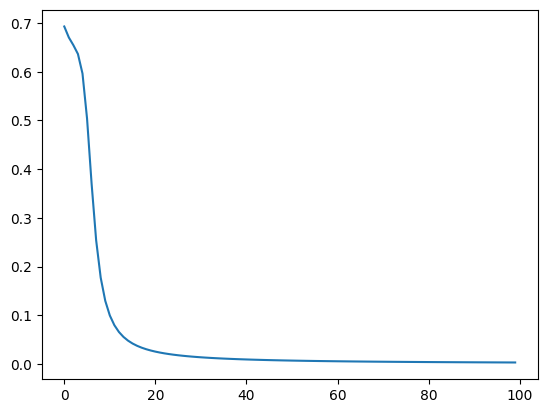

In [9]:
NN(X,y)